# Logistic regression To predict heart disease

## Tabel of content
<ul>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#Overview">Data Overview</a></li>
    <li><a href="#Cleaning">Data Cleaning</a></li>
    <li><a href="#Exploratory">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#Predictive">Predictive Modeling</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Introduction'></a>
## Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression


## Dataset
- <b>Sex:</b> male or female. (0: female, 1:male)
- <b>Age:</b> Age of the patient.
- <b>Current Smoker:</b> whether or not the patient is a current smoker.
- <b>Cigs Per Day:</b> the number of cigarettes that the person smoked on average in one day.
- <b>BP Meds:</b> whether or not the patient was on blood pressure medication.
- <b>Prevalent Stroke:</b> whether or not the patient had previously had a stroke.
- <b>Prevalent Hyp:</b> whether or not the patient was hypertensive.
- <b>Diabetes:</b> whether or not the patient had diabetes.
- <b>Tot Chol:</b> total cholesterol level.
- <b>Sys BP:</b> systolic blood pressure.
- <b>Dia BP:</b> diastolic blood pressure.
- <b>BMI:</b> Body Mass Index.
- <b>Heart Rate:</b> heart rate. 
- <b>Glucose:</b> glucose level.
- <b>TenYearCHD:</b> 10 year risk of coronary heart disease CHD.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("framingham.csv")

In [4]:
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1557,1,59,1.0,0,0.0,1.0,0,1,0,294.0,170.0,103.0,31.60,66.0,70.0,0
3747,0,59,2.0,0,0.0,0.0,0,1,0,233.0,149.0,85.0,24.67,120.0,72.0,0
182,1,36,1.0,1,40.0,0.0,0,0,0,215.0,118.0,76.0,18.99,96.0,97.0,0
1036,0,62,3.0,1,20.0,0.0,0,0,0,264.0,142.0,90.0,31.78,95.0,97.0,0
574,0,39,3.0,1,30.0,0.0,0,1,0,277.0,148.0,100.0,24.12,85.0,72.0,0


<a id='Overview'></a>
# Data Overview

In [5]:
df.shape

(4238, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.drop('education', axis=1, inplace=True)

In [9]:
df.rename({"male":"Sex"}, axis=1, inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
len(df)

4238

In [13]:
null_value = (100 * df.isnull().sum() / len(df))
null_value = null_value.sort_values()

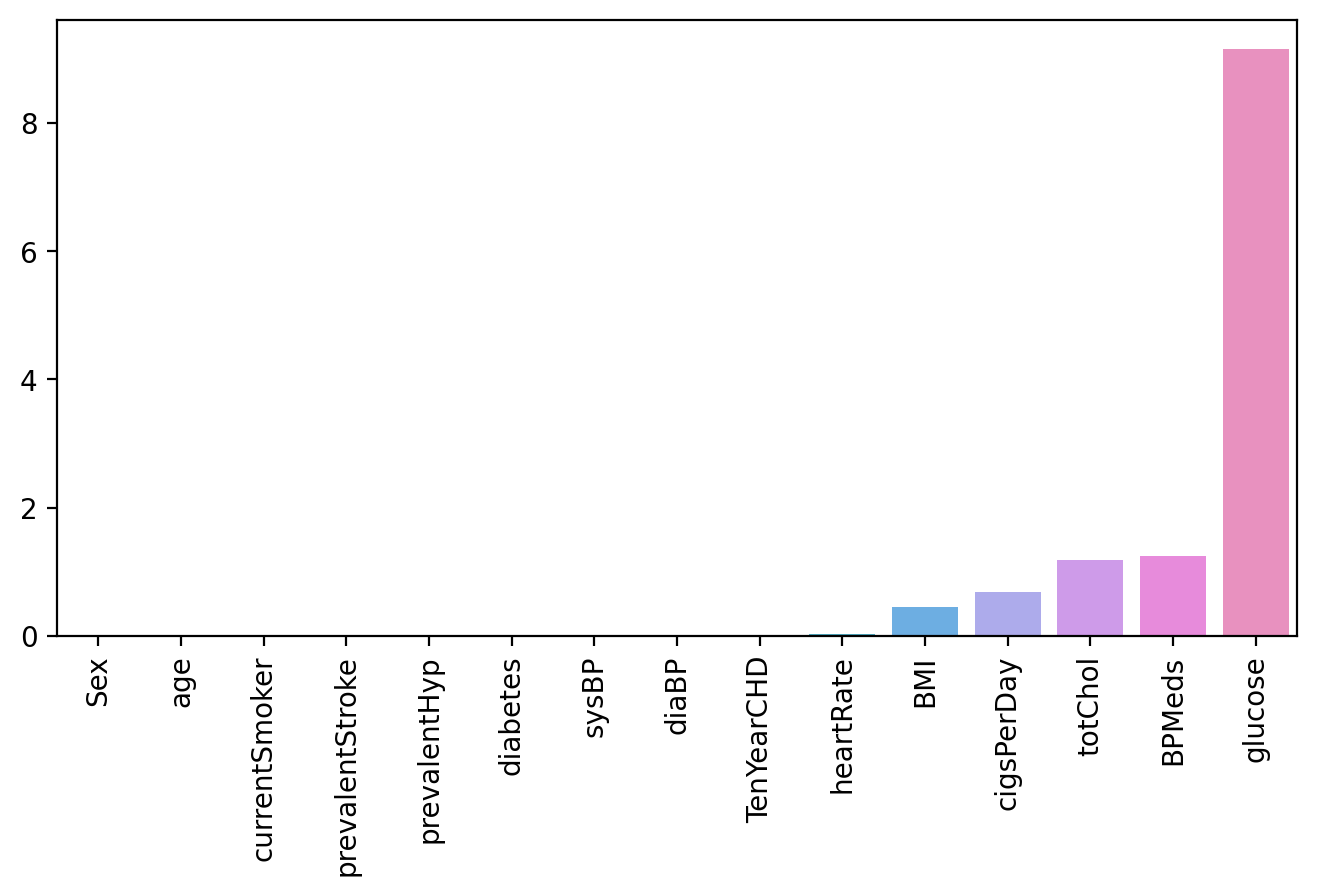

In [14]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=null_value.index, y=null_value)
plt.xticks(rotation=90);

<a id='Cleaning'></a>
# Data Cleaning

In [15]:
df[df['glucose'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
54,0,39,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
70,0,63,0,0.0,0.0,0,0,0,248.0,164.5,76.0,29.35,70.0,NaN,0
111,1,51,0,0.0,0.0,0,1,0,214.0,145.0,92.5,26.09,70.0,NaN,0
114,0,41,0,0.0,0.0,0,1,0,265.0,136.0,98.0,42.15,90.0,NaN,0
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
154,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0


In [16]:
df['glucose'].mean()

81.96675324675324

In [17]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [18]:
df['glucose'].isnull().sum()

0

In [19]:
df[df['BPMeds'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.000000,0
77,0,44,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.000000,0
193,1,45,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.000000,1
245,1,46,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.000000,0
314,0,39,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.000000,0
395,0,65,0,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.000000,1
421,1,44,0,0.0,NaN,0,0,1,190.0,122.0,81.0,36.12,70.0,143.000000,0
765,1,50,1,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.000000,1
769,0,37,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.000000,0
797,0,59,0,0.0,NaN,0,1,0,240.0,195.0,118.0,23.82,80.0,73.000000,0


In [20]:
df['BPMeds'] = df['BPMeds'].fillna(0)

In [21]:
df[df['totChol'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,81.966753,1
154,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,81.966753,0
247,0,40,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,81.966753,1
429,1,65,0,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.000000,0
567,0,66,1,15.0,0.0,0,1,0,NaN,188.0,108.5,20.49,90.0,81.966753,0
577,0,37,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,81.966753,0
609,0,41,1,30.0,0.0,0,0,0,NaN,122.5,80.0,18.86,105.0,81.966753,0
673,0,58,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,81.966753,0
822,0,62,1,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,81.966753,0
834,0,59,0,0.0,0.0,0,1,0,NaN,153.5,89.5,26.08,71.0,113.000000,0


In [22]:
df['totChol'].mean()

236.72158548233045

In [23]:
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

In [24]:
df[df['BMI'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,0,0.0,0.0,0,0,0,205.000000,100.0,60.0,NaN,60.0,72.000000,1
294,0,47,1,25.0,0.0,0,1,1,258.000000,195.0,90.0,NaN,86.0,81.966753,1
705,0,45,0,0.0,0.0,0,0,0,231.000000,107.5,57.5,NaN,81.0,81.966753,0
1155,0,64,1,3.0,0.0,0,0,0,221.000000,148.0,85.0,NaN,90.0,80.000000,1
1161,0,47,0,0.0,0.0,0,0,0,195.000000,126.0,75.0,NaN,60.0,81.966753,1
1594,0,40,0,0.0,0.0,0,0,0,164.000000,135.0,75.0,NaN,75.0,85.000000,0
1604,1,40,1,20.0,0.0,0,0,0,266.000000,101.0,73.0,NaN,70.0,64.000000,0
1624,0,70,0,0.0,0.0,1,1,0,107.000000,143.0,93.0,NaN,68.0,62.000000,1
1747,0,51,0,0.0,0.0,0,0,0,236.721585,130.0,89.5,NaN,80.0,81.966753,0
1975,1,63,1,20.0,0.0,1,1,0,213.000000,163.0,94.0,NaN,76.0,69.000000,1


In [25]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [26]:
df[df['cigsPerDay'].isnull()].head(15)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,81.966753,0
139,1,49,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.000000,1
1046,0,49,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.000000,0
1292,1,42,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.000000,0
1347,0,58,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,81.966753,0
1451,1,54,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.000000,0
1497,1,55,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.000000,0
1610,0,61,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.000000,0
1625,0,49,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.000000,0
1870,0,47,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.000000,0


In [27]:
df['cigsPerDay'].mean()

9.003088619624615

In [28]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(9)

In [29]:
df.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [30]:
df[df['heartRate'].isnull()]

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [31]:
df = df.dropna(subset=['heartRate'], axis=0)

In [32]:
df.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [33]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)

In [34]:
df['BPMeds'] = df['BPMeds'].astype(int)

<a id='Exploratory'></a>
# Exploratory Data Analysis (EDA)

BPmeds = ياكل حبوب ضغط او لا
PrevStoke = قد جته سكته دماغيه او لا
prevHyp = عنده ارتفاع ضعط ادم او لا
Diabetes = عنده مرض سكري او لا
totchol = الكلسترول
BP = ضغط الدم الانبساطي والانقباضي

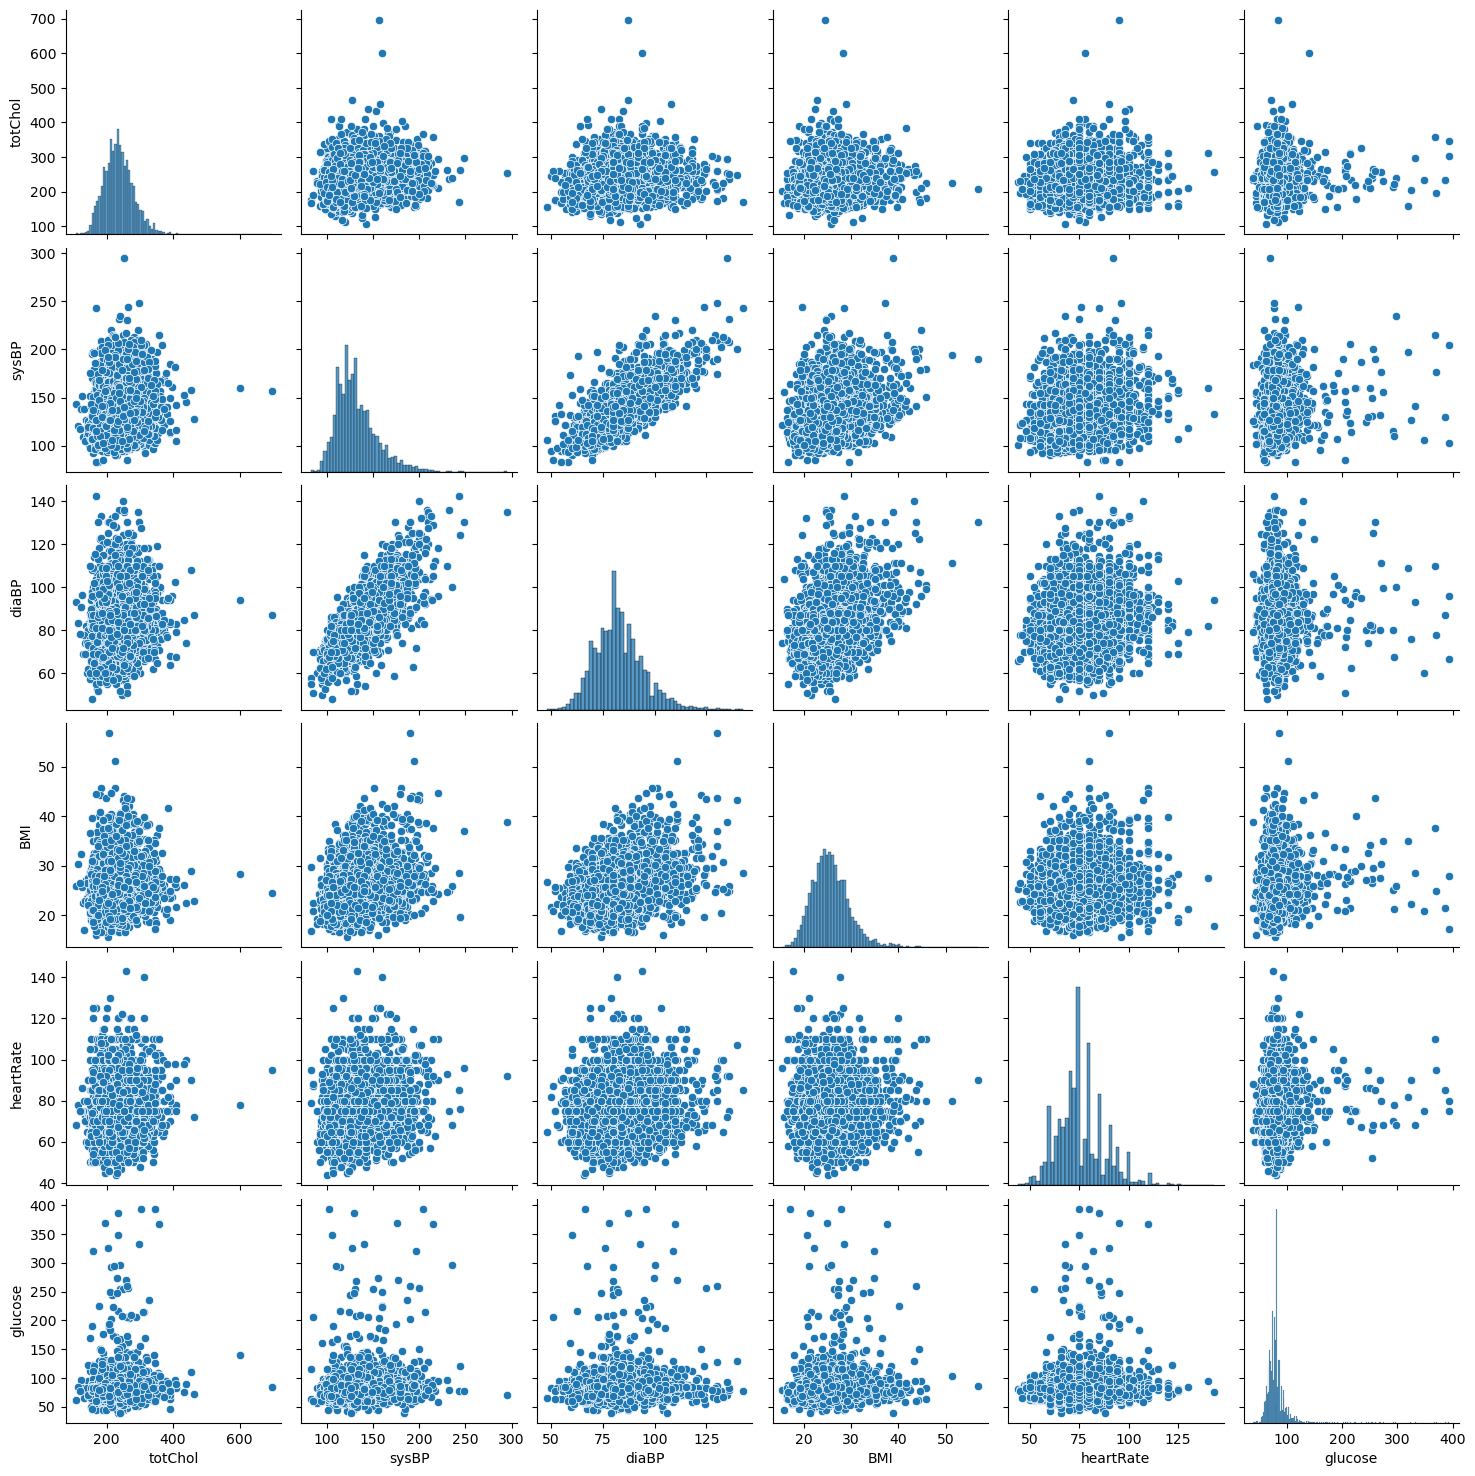

In [35]:
sns.pairplot(data=df, vars=["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]);

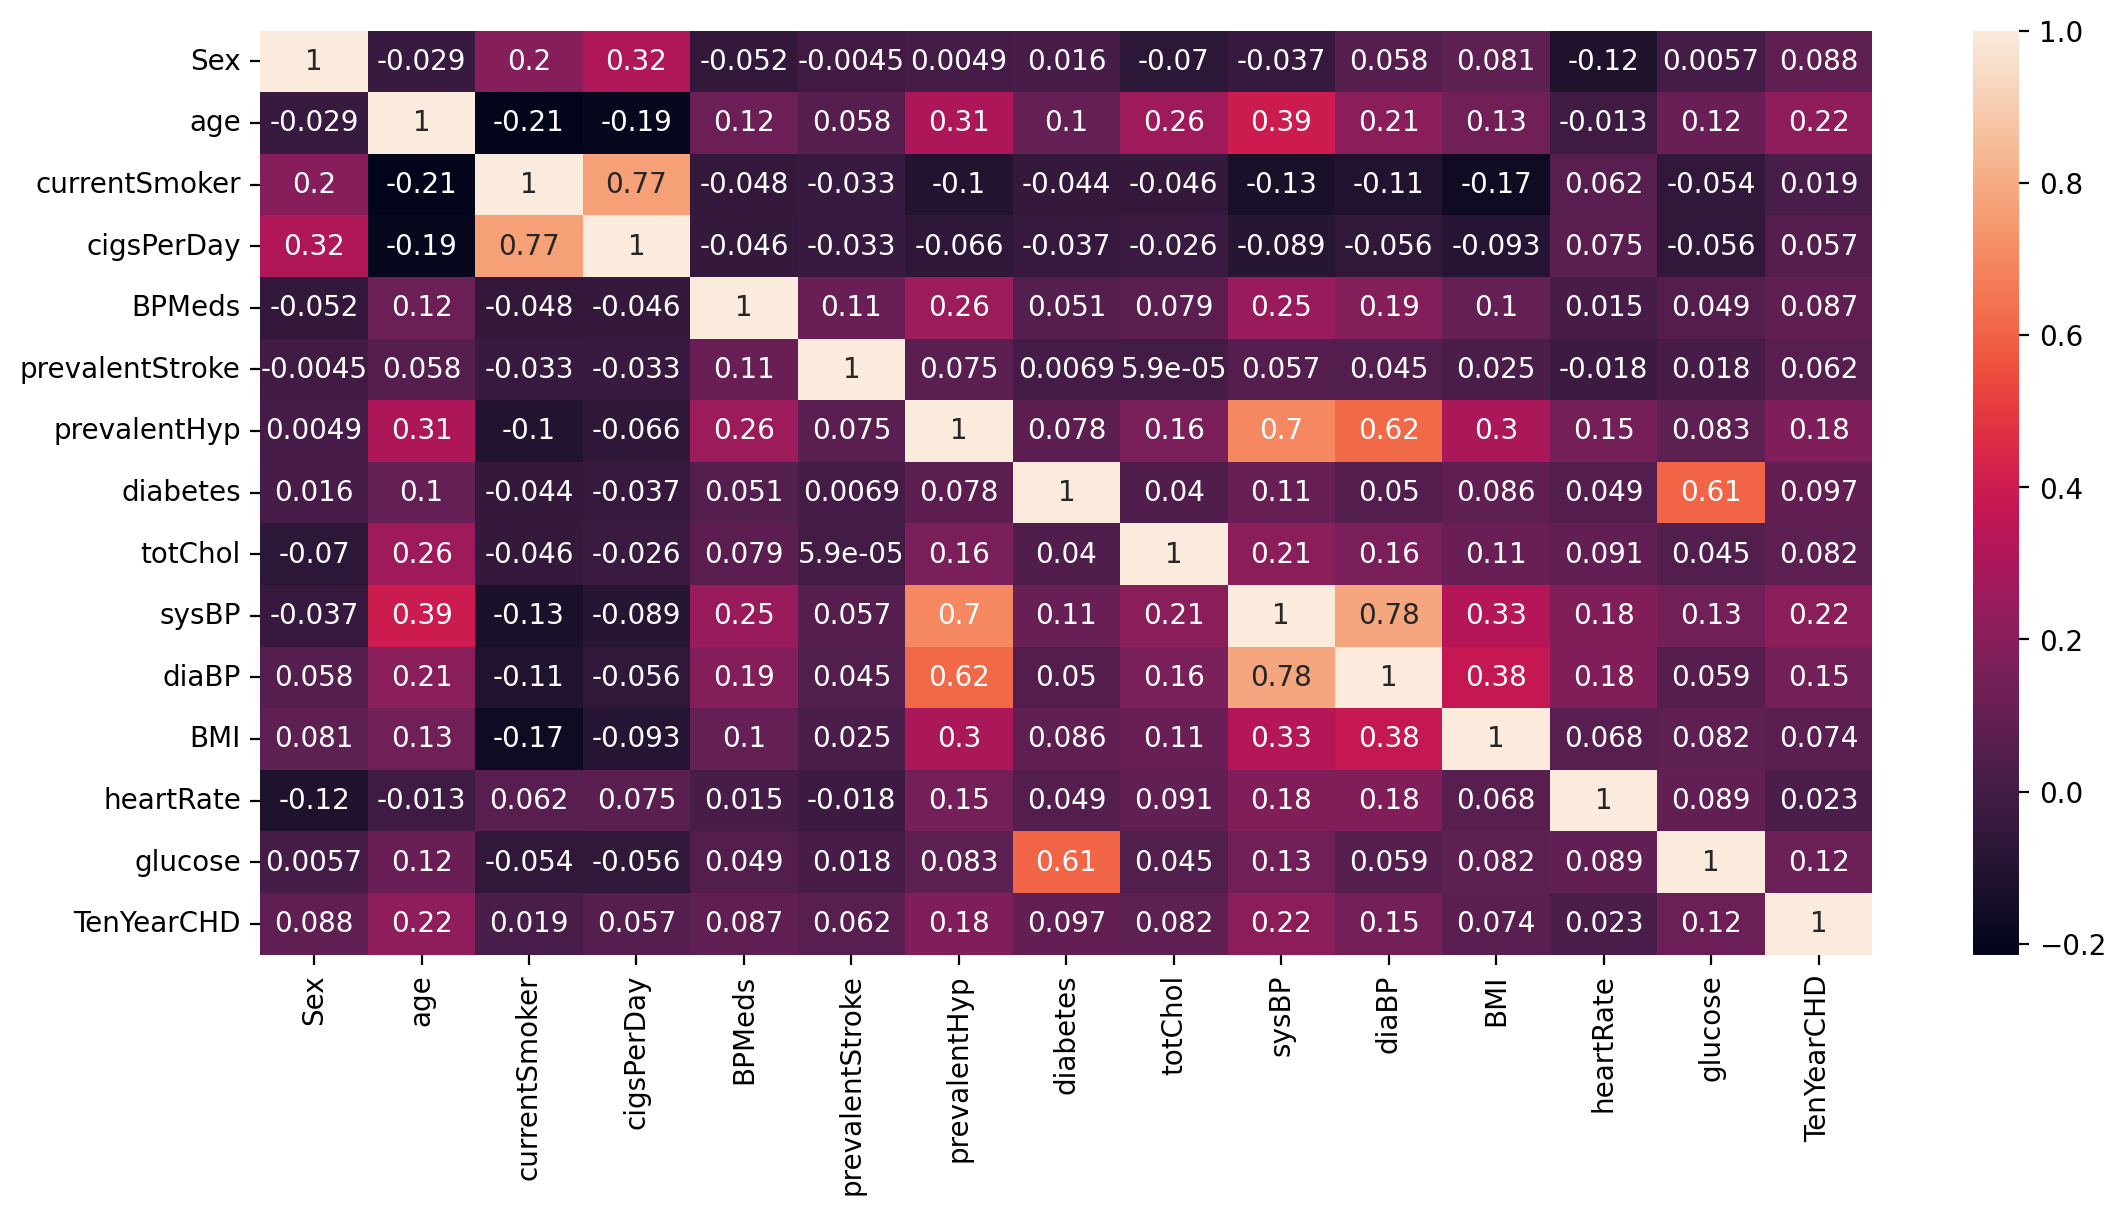

In [78]:
plt.figure(figsize=(13,6), dpi=200)
sns.heatmap(df.corr(), annot=True);

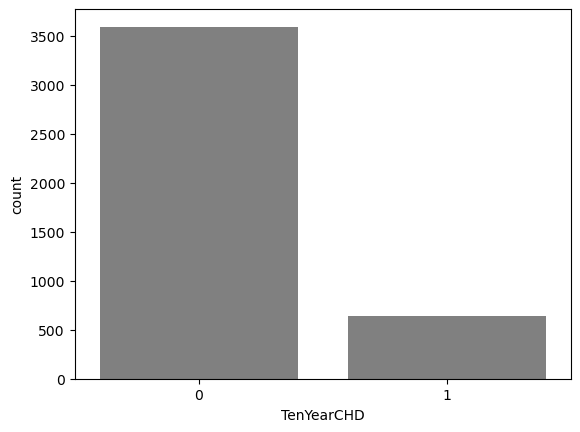

In [111]:
sns.countplot(df, x="TenYearCHD", color='gray');

In [40]:
pd.pivot_table(df, index=['Sex', 'currentSmoker'], aggfunc='mean')

BMI    BPMeds  TenYearCHD        age  cigsPerDay  \
Sex currentSmoker                                                           
0   0              26.250092  0.041929    0.134172  51.622642    0.000000   
    1              24.448619  0.029352    0.110324  47.160931   14.053644   
1   0              26.926132  0.028050    0.166900  50.939691    0.000000   
    1              25.703319  0.013575    0.201810  48.226244   21.947511   

                       diaBP  diabetes    glucose  heartRate  prevalentHyp  \
Sex currentSmoker                                                            
0   0              83.896925  0.025856  82.663368  76.576520      0.368274   
    1              79.975202  0.020243  80.675754  77.845142      0.221660   
1   0              84.692847  0.046283  84.243530  72.251052      0.336606   
    1              83.049321  0.017195  80.741665  75.558371      0.297738   

                   prevalentStroke       sysBP     totChol  
Sex currentSmoker                                           
0   0                     0.008386  136.310273  242.708278  
    1                     0.003036  128.303644  234.635104  
1   0                     0.008415  132.936886  230.802475  
    1                     0.003620  130.433484  234.669580

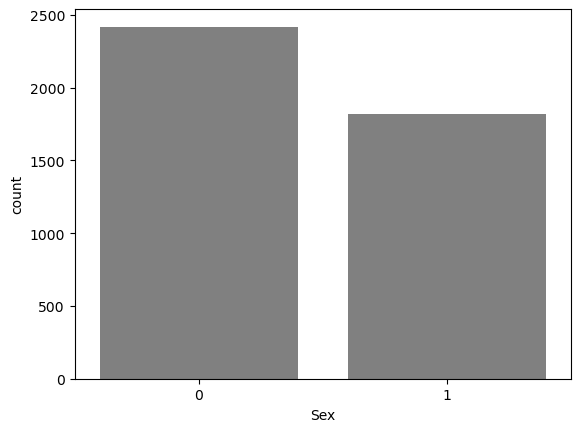

In [48]:
sns.countplot(data=df, x='Sex', color='gray');

In [51]:
min_count = df["Sex"].value_counts().min()
min_count

1818

In [64]:
sample_female = df[df['Sex'] == 0].sample(n=min_count, random_state=101)
sample_male = df[df['Sex'] == 1].sample(n=min_count, random_state=101)

gender = pd.concat([sample_female, sample_male], axis=0)
gender = gender.sample(frac=1).reset_index(drop=True) #shuffle the row
gender.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,45,1,5,0,0,1,0,228.0,191.5,95.5,27.94,95.0,81.966753,0
1,1,62,1,3,0,0,0,0,234.0,117.0,80.0,26.97,78.0,67.000000,0
2,1,40,1,20,0,0,0,0,290.0,120.0,89.0,27.99,80.0,66.000000,0
3,1,40,1,30,0,0,1,0,282.0,130.0,80.0,23.90,66.0,68.000000,0
4,0,48,0,0,0,0,0,0,274.0,110.0,84.0,22.51,110.0,78.000000,0


<Axes: xlabel='Sex', ylabel='TenYearCHD'>

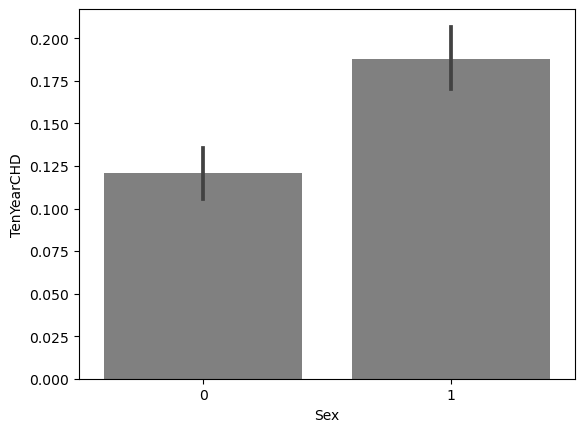

In [72]:
sns.barplot(data=gender, x='Sex', y='TenYearCHD', color='gray');

In [73]:
pd.pivot_table(df, index=['Sex', 'TenYearCHD'], aggfunc='mean')

BMI    BPMeds        age  cigsPerDay  currentSmoker  \
Sex TenYearCHD                                                              
0   0           25.350785  0.028801  49.048159    5.747875       0.415014   
    1           26.664970  0.093023  55.093023    5.684385       0.362126   
1   0           26.136169  0.014905  48.365176   12.966802       0.597561   
    1           26.384544  0.038012  53.283626   14.950292       0.652047   

                    diaBP  diabetes    glucose  heartRate  prevalentHyp  \
Sex TenYearCHD                                                            
0   0           81.631964  0.018414  80.900372  77.036355      0.272899   
    1           86.961794  0.059801  88.544638  77.504983      0.558140   
1   0           82.920054  0.020325  80.663127  73.934282      0.279810   
    1           87.033626  0.064327  88.381291  75.672515      0.456140   

                prevalentStroke       sysBP     totChol  
Sex TenYearCHD                                           
0   0                  0.004249  131.089235  237.686958  
    1                  0.019934  146.767442  251.541698  
1   0                  0.003388  129.249322  231.607458  
    1                  0.014620  140.763158  239.822933

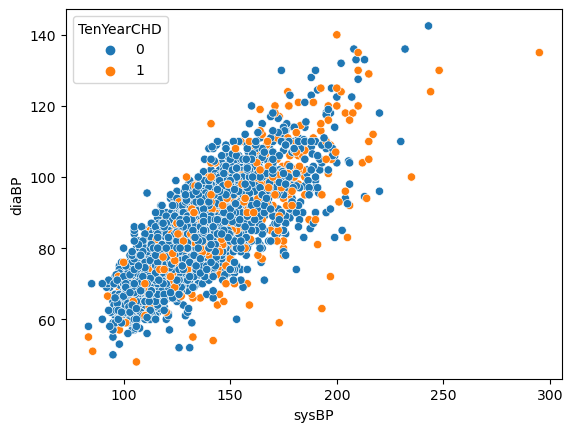

In [81]:
sns.scatterplot(data=df, x='sysBP', y='diaBP', hue="TenYearCHD");

In [83]:
pd.pivot_table(df, index=['prevalentHyp'], aggfunc="mean")

,BMI,BPMeds,Sex,TenYearCHD,age,cigsPerDay,currentSmoker,diaBP,diabetes,glucose,heartRate,prevalentStroke,sysBP,totChol
prevalentHyp,,,,,,,,,,,,,,
0,24.980936,0.000000,0.427447,0.109172,47.817933,9.528747,0.528747,77.972108,0.017454,80.696038,74.690965,0.002053,122.048768,231.872093
1,27.623821,0.094297,0.432700,0.246388,53.500380,7.828137,0.416730,93.834981,0.044106,84.783480,78.518631,0.014449,155.217110,247.510893


<a id='Predictive'></a>
# Predictive Modeling

### Training and Validation

In [84]:
X = df.drop("TenYearCHD", axis=1)
y = df['TenYearCHD']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(X_train)

StandardScaler()

In [93]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

### Training the Model

In [102]:
from sklearn.linear_model import LogisticRegressionCV

In [103]:
model = LogisticRegressionCV()

In [104]:
model.fit(scaled_x_train, y_train)

LogisticRegressionCV()

In [107]:
model.coef_

array([[ 0.24196025,  0.47413201,  0.01845429,  0.21433176,  0.05153418,
         0.03677144,  0.14561053,  0.0595882 ,  0.10340585,  0.23071946,
         0.02448638, -0.00561779, -0.02587841,  0.16417303]])

In [109]:
model.C_

array([0.04641589])

In [110]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [118]:
X.columns

Index(['Sex', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [119]:
cofs = pd.Series(index=X.columns, data=model.coef_[0])

### Evaluating the Model

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
pred = model.predict(scaled_x_test)

<a id='Conclusion'></a>
# Conclusion